# Introduction to Pandas and Its Role in Data Analysis

Pandas is one of the most popular Python libraries for data analysis, data cleaning, and transformation. In this lesson, you will learn how to explore, prepare, and analyze real-world data using pandas.

We will use the Titanic dataset to practice key skills such as filtering, aggregating, and visualizing data.

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Import pandas
import pandas as pd
import numpy as np

np.random.seed(42)

# Load Titanic data from a GitHub URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Print dataset shape
print(df.shape)

# Show first 3 rows
print(df.head(3))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [2]:
# use np and loop to print numbers from 0 to 9
values = np.arange(10)
print(values)
print("Mean of values:", np.mean(values))
print("Median of values:", np.median(values))   
print("Mode of values:", pd.Series(values).mode()[0])


[0 1 2 3 4 5 6 7 8 9]
Mean of values: 4.5
Median of values: 4.5
Mode of values: 0


# What is a DataFrame?

A DataFrame is a two-dimensional table used for storing data. 
- It is similar to a spreadsheet in Excel or a SQL table. 
- Each row is an observation, and each column is a field or variable. 
- Pandas makes it easy to manipulate, filter, and analyze these tables.


In [4]:

# Look at column names and types
print(df.dtypes)

# Show more summary info(null counts, memory usage, etc.)
print(df.info())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2

In [5]:
# Which columns in the dataset might have missing values?
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data Cleaning: Handling Missing Values

Real-world data is rarely perfect. We often have to deal with missing or incomplete data. In pandas, we can easily check for missing values and decide how to fill or drop them.

In [6]:
# Basic statistics for numerical columns
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
# Drop rows where 'Age' is missing
df_clean = df.dropna(subset=['Age'])
print(df_clean.shape)

(714, 12)


In [8]:
# Fill missing values in the 'Embarked' column with the mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
print(df['Embarked'].isnull().sum())

0


# Selecting and Filtering Data(Narrowing down)

Pandas makes it easy to filter rows and select specific columns. You can use boolean expressions (comparisons) to get just the data you want.

In [9]:
# select all female passengers
females = df[df['Sex'] == 'female']
print(females.head(3))

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


In [10]:
# Find passengers under 18 
kids = df[df['Age'] < 18]
# print there name age and sex
print(kids[['Name', 'Age', 'Sex']].head(3))

                                   Name   Age     Sex
7        Palsson, Master. Gosta Leonard   2.0    male
9   Nasser, Mrs. Nicholas (Adele Achem)  14.0  female
10      Sandstrom, Miss. Marguerite Rut   4.0  female


In [11]:
# Find the youngest passenger
youngest_age = df['Age'].min()
# print the youngest passenger's name and age
youngest_passenger = df[df['Age'] == youngest_age]
print(youngest_passenger[['Name', 'Age']])

                                Name   Age
803  Thomas, Master. Assad Alexander  0.42


In [12]:
# Select only the columns 'Name', 'Age', and 'Fare'
selected_columns = df[['Name', 'Age', 'Fare']]  
print(selected_columns.head(3))

                                                Name   Age     Fare
0                            Braund, Mr. Owen Harris  22.0   7.2500
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  71.2833
2                             Heikkinen, Miss. Laina  26.0   7.9250


# Grouping and Aggregating Data
- Grouping is the fastest way to find pattern in your data
- Pandas lets you group data and calculate summary statistics easily.
- This is powerful for answering comparison questions, such as survival rate by gender.

In [13]:
# Calculate average fare by passenger class
avg_fare = df.groupby('Pclass')['Fare'].mean()
print(avg_fare)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [14]:
# Survival rate by gender
survival_rate = df.groupby('Sex')['Survived'].mean()
print(survival_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [15]:
# Count survivals by passenger class and gender
survival_counts = df.groupby(['Pclass', 'Sex'])['Survived'].sum()
print(survival_counts)

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64


# Merging and Joining DataFrames

- Sometimes you need to combine information from multiple tables. 
- Pandas makes it easy to join data, similar to SQL joins in databases.

In [16]:
# Simulate joining: add a column with random loyalty points
import numpy as np
np.random.seed(42)
loyalty_points = np.random.randint(0, 100, size=len(df))
df2 = pd.DataFrame({'PassengerId': df['PassengerId'], 'Points': loyalty_points})
merged = pd.merge(df, df2, on='PassengerId')
print(merged[['Name', 'Points']].head(3))

                                                Name  Points
0                            Braund, Mr. Owen Harris      51
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      92
2                             Heikkinen, Miss. Laina      14


# Pivot Tables and Data Reshaping

- Pivot tables let you reorganize your data for easy comparison and quick summaries. 
- Pandas can turn long tables into wide tables for reporting.
- Think about what rows and columns you want to compare side by side

In [20]:
# Create a pivot table for survival rate by port and class
pivot_table = pd.pivot_table(df, values='Survived', index='Embarked', columns='Pclass', aggfunc='mean')
print(pivot_table)

Pclass           1         2         3
Embarked                              
C         0.694118  0.529412  0.378788
Q         0.500000  0.666667  0.375000
S         0.589147  0.463415  0.189802


# Time-Series Example: Plotting Age Distribution by Class

While the Titanic dataset is not a time series, we can explore trends within the data, such as age distribution. 
Pandas integrates well with plotting libraries for visual analysis.

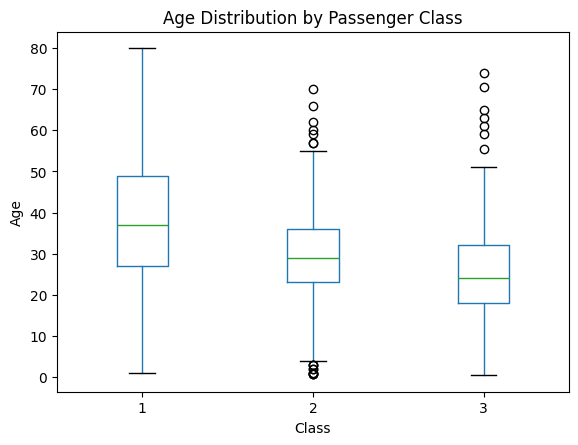

In [21]:
import matplotlib.pyplot as plt

df.boxplot(column='Age', by='Pclass', grid=False)
plt.title('Age Distribution by Passenger Class')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

# Mini-Project: Simple Titanic Data Exploration

- Let us put everything together with a short exercise. 
- Can you find all female passengers in first class, calculate their average age, and plot Fare versus Age?

                                                 Name   Age     Fare
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  71.2833
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  53.1000
11                           Bonnell, Miss. Elizabeth  58.0  26.5500
Average age: 34.61


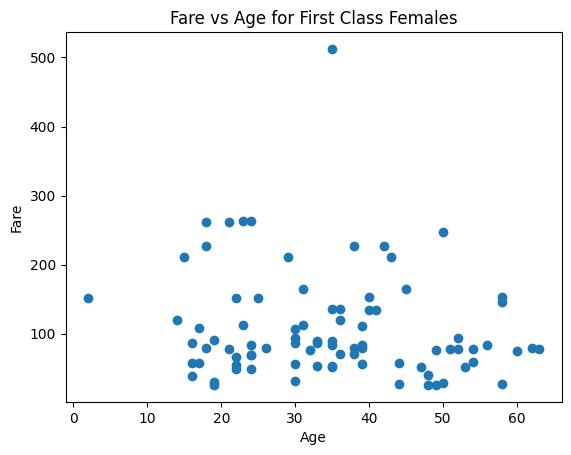

In [22]:
# Find first class females
first_female = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]
print(first_female[['Name', 'Age', 'Fare']].head(3))

# Average age
avg_age = first_female['Age'].mean()
print(f"Average age: {avg_age:.2f}")

# Plot Fare vs Age
plt.scatter(first_female['Age'], first_female['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs Age for First Class Females')
plt.show()

# Best Practices and Performance Tips

- Always scan the top and bottom of your data with `.head()` and `.tail()`.
- Use `df.info()` and `df.describe()` to explore data health early.
- For large datasets, try to process columns instead of rows for faster performance.
- Prefer chaining methods for concise, readable code.
- Save checkpoints with `to_csv()` so you can reload without starting over.